In [177]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # Data Visualization 
import seaborn as sns # Data Visualization
from scipy.stats import norm # Normalizer
from sklearn.preprocessing import StandardScaler # Standard Scaling
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

import os
print(os.listdir("../input"))

['Submission.csv', 'Train.csv', 'Test.csv']


In [178]:
# Imported the datasets
train = pd.read_csv('../input/Train.csv')
test = pd.read_csv('../input/Test.csv')

In [179]:
#Inspection of columns
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

**Univariate Analysis of column Item_Outlet_Sales**

In [180]:
train['Item_Outlet_Sales'].describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

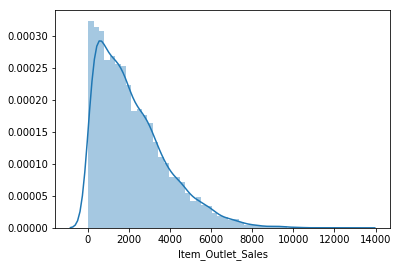

In [181]:
#Histogram
sns.distplot(train['Item_Outlet_Sales'])

* Deviate from the normal distribution.
* Have appreciable positive skewness.
* Show peakedness.

In [182]:
print('Skew : {0:.2f}'.format(train['Item_Outlet_Sales'].skew()))
print('Kurtosis : {0:.2f}'.format(train['Item_Outlet_Sales'].kurt()))

Skew : 1.18
Kurtosis : 1.62


**Bi-Variate Analysis for Item_Outlet_Sales vs Categorical Features**

*Item_Outlet_Sales Vs Item_Fat_Content*

In [183]:
#But first Let's check the categories present in column Item_Fat_Content
train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [184]:
train.loc[train['Item_Fat_Content']== 'LF','Item_Fat_Content'] = 'Low Fat'
train.loc[train['Item_Fat_Content']== 'low fat','Item_Fat_Content'] = 'Low Fat'
train.loc[train['Item_Fat_Content']== 'reg','Item_Fat_Content'] = 'Regular'

In [185]:
train['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

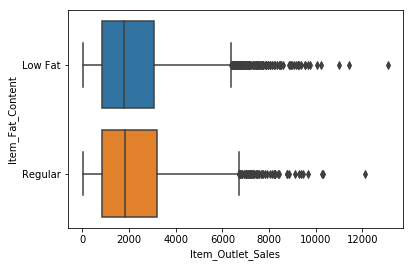

In [186]:
sns.boxplot(train['Item_Outlet_Sales'],train['Item_Fat_Content'])

*Item_Outlet_Sales Vs Item_Type*

In [187]:
train['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

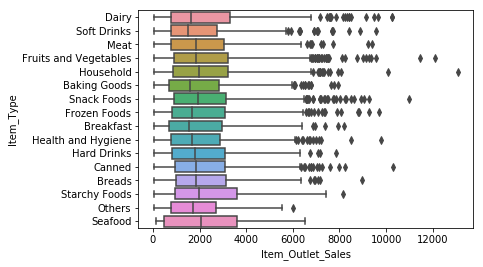

In [188]:
sns.boxplot(train['Item_Outlet_Sales'],train['Item_Type'])

In [189]:
train.pivot_table('Item_Outlet_Sales','Item_Type',aggfunc=np.average)

,Item_Outlet_Sales
Item_Type,
Baking Goods,1952.971207
Breads,2204.132226
Breakfast,2111.808651
Canned,2225.194904
Dairy,2232.542597
Frozen Foods,2132.867744
Fruits and Vegetables,2289.009592
Hard Drinks,2139.221622
Health and Hygiene,2010.000265


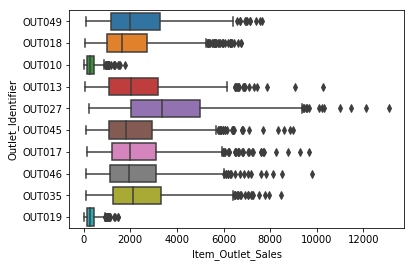

In [190]:
#Item_Outlet_Sales vs Outlet_Identifier
sns.boxplot(train['Item_Outlet_Sales'],train['Outlet_Identifier'])

In [191]:
train.pivot_table('Item_Outlet_Sales','Outlet_Identifier',aggfunc=np.average)

,Item_Outlet_Sales
Outlet_Identifier,
OUT010,339.351662
OUT013,2298.995256
OUT017,2340.675263
OUT018,1995.498739
OUT019,340.329723
OUT027,3694.038558
OUT035,2438.841866
OUT045,2192.384798
OUT046,2277.844267


*So outlet OUT027 is performing great in terms of Outlet_Sales and OUT010 and OUT019 are performing poorly as compared to others which are around the same range*

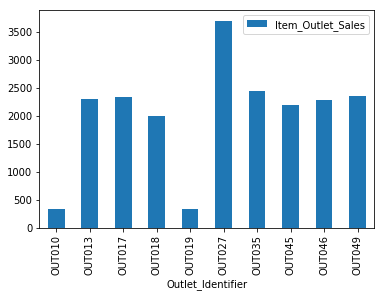

In [192]:
train.pivot_table('Item_Outlet_Sales','Outlet_Identifier',aggfunc=np.average).plot.bar()

In [193]:
train.pivot_table('Item_Outlet_Sales','Outlet_Establishment_Year',aggfunc=np.average)

,Item_Outlet_Sales
Outlet_Establishment_Year,
1985,2483.677474
1987,2298.995256
1997,2277.844267
1998,339.351662
1999,2348.354635
2002,2192.384798
2004,2438.841866
2007,2340.675263
2009,1995.498739


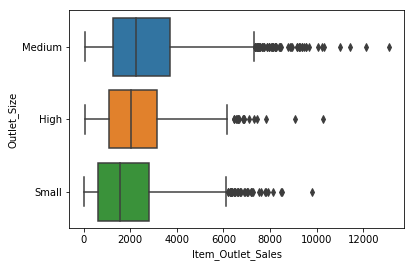

In [194]:
sns.boxplot(train['Item_Outlet_Sales'],train['Outlet_Size'])

In [195]:
train.pivot_table('Item_Outlet_Sales','Outlet_Size',aggfunc=np.average)

,Item_Outlet_Sales
Outlet_Size,
High,2298.995256
Medium,2681.603542
Small,1912.149161


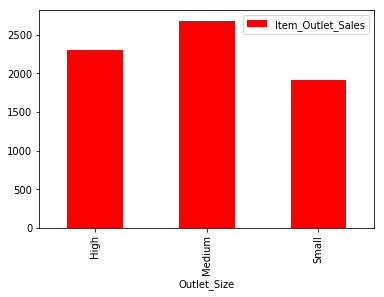

In [196]:
train.pivot_table('Item_Outlet_Sales','Outlet_Size',aggfunc=np.average).plot.bar(color='red')

***'Item_Outlet_Sales' Vs 'Outlet_Location_Type'***

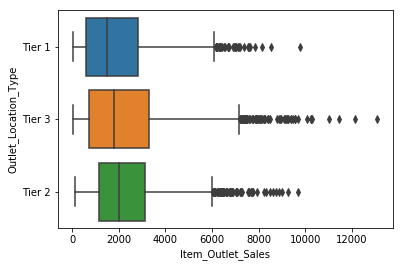

In [197]:
    sns.boxplot(train['Item_Outlet_Sales'],train['Outlet_Location_Type'])

In [198]:
train.pivot_table('Item_Outlet_Sales','Outlet_Location_Type',aggfunc=np.average)

,Item_Outlet_Sales
Outlet_Location_Type,
Tier 1,1876.909159
Tier 2,2323.990559
Tier 3,2279.627651


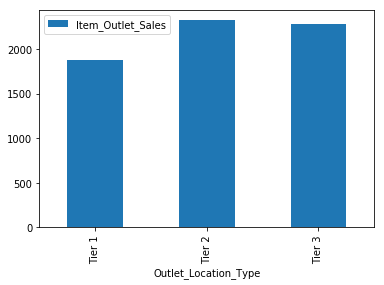

In [199]:
train.pivot_table('Item_Outlet_Sales','Outlet_Location_Type',aggfunc=np.average).plot.bar()

***'Item_Outlet_Sales' Vs 'Outlet_Type'***

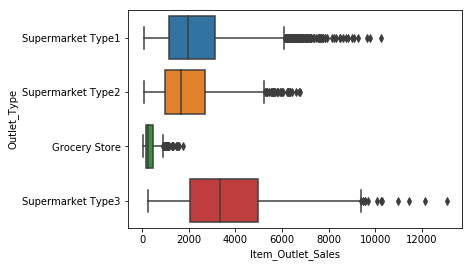

In [200]:
    sns.boxplot(train['Item_Outlet_Sales'],train['Outlet_Type'])

In [201]:
train.pivot_table('Item_Outlet_Sales','Outlet_Type',aggfunc=np.average)

,Item_Outlet_Sales
Outlet_Type,
Grocery Store,339.828500
Supermarket Type1,2316.181148
Supermarket Type2,1995.498739
Supermarket Type3,3694.038558


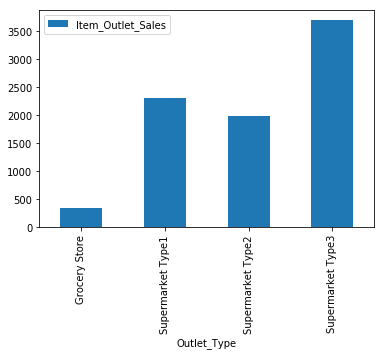

In [202]:
train.pivot_table('Item_Outlet_Sales','Outlet_Type',aggfunc=np.average).plot.bar()

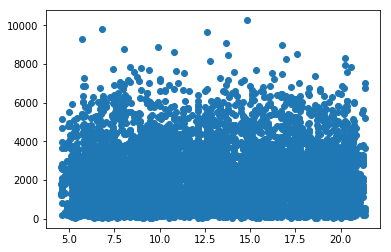

In [203]:
plt.scatter(train['Item_Weight'],train['Item_Outlet_Sales'])

Text(0.5, 0, 'Item Visib')

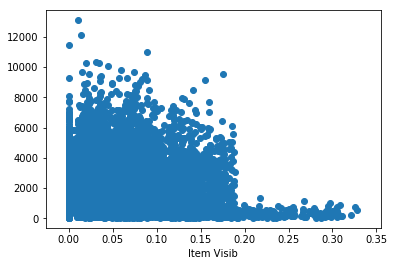

In [204]:
plt.scatter(train['Item_Visibility'],train['Item_Outlet_Sales'])
plt.xlabel('Item Visib')

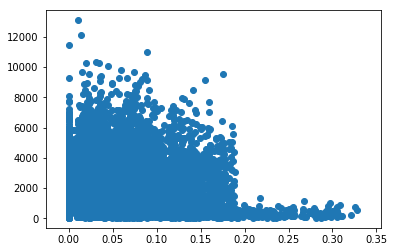

In [205]:
plt.scatter(train['Item_Visibility'],train['Item_Outlet_Sales'])